In [26]:
# You must install this system library to make pylibdmtx work
# sudo apt-get install libdmtx0b

In [20]:
from PIL import Image
import pylibdmtx.pylibdmtx
import albumentations
import numpy as np
import pandas as pd
import os

# First exploration

In [2]:
encoded = pylibdmtx.pylibdmtx.encode('Some new example. Second example.'.encode('utf8'))
img = Image.frombytes('RGB', (encoded.width, encoded.height), encoded.pixels)
img.save('pictures/dmtx.png')
decoded = pylibdmtx.pylibdmtx.decode(Image.open('pictures/dmtx.png'))
decoded[0].data.decode("utf8")

'Some new example. Second example.'

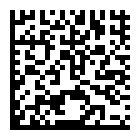

In [447]:
img

In [448]:
im_array = np.array(img)
for i in range(9):
    im_array[50][i] = [0, 0, 0]

In [449]:
pylibdmtx.pylibdmtx.decode(np.array(img))

[Decoded(data=b'Some new example. Second example.', rect=Rect(left=9, top=10, width=120, height=119))]

In [450]:
import torch
i = np.resize(np.array(img), (3, 1, 140, 140))
t  = torch.from_numpy(i)
t.shape

torch.Size([3, 1, 140, 140])

In [451]:
i = np.array(img).reshape(3, 1, 140, 140)
t  = torch.from_numpy(i)
t.shape

torch.Size([3, 1, 140, 140])

In [452]:
import my_utils
n = my_utils.tensor_to_numpy_for_image(t)
n.shape

(3, 140, 140, 1)

In [453]:
n[0].shape

(140, 140, 1)

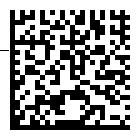

In [454]:
img2 = Image.fromarray(im_array)
img2

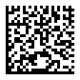

In [455]:
img_res = img.resize(size=(80,80))
img_res

In [456]:
pylibdmtx.pylibdmtx.decode(img_res)

[Decoded(data=b'Some new example. Second example.', rect=Rect(left=5, top=5, width=69, height=69))]

In [457]:
np.sum(np.asarray(img) == np.asarray(img2))

58773

In [458]:
pylibdmtx.pylibdmtx.decode(img2)

[Decoded(data=b'Some new example. Second example.', rect=Rect(left=8, top=10, width=121, height=119))]

In [459]:
pylibdmtx.pylibdmtx.decode(img)

[Decoded(data=b'Some new example. Second example.', rect=Rect(left=9, top=10, width=120, height=119))]

In [460]:
pylibdmtx.pylibdmtx.decode(img)[0].data.decode("utf8")

'Some new example. Second example.'

In [461]:
# parrots = Image.open("pictures/parrot.jpg")
# parrots

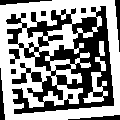

In [462]:
encoded = pylibdmtx.pylibdmtx.encode('Some rotated example.'.encode('utf8'))
img_rotated = Image.frombytes('RGB', (encoded.width, encoded.height), encoded.pixels)
img_rotated = img_rotated.rotate(95)
img_rotated

In [463]:
decoded_rotated = pylibdmtx.pylibdmtx.decode(img_rotated)
decoded_rotated

[Decoded(data=b'Some rotated example.', rect=Rect(left=113, top=14, width=-106, height=91))]

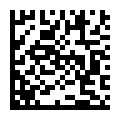

In [464]:
encoded = pylibdmtx.pylibdmtx.encode('Some colorful example.'.encode('utf8'))
img_colorful = Image.frombytes('RGB', (encoded.width, encoded.height), encoded.pixels)
img_colorful

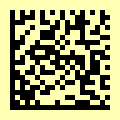

In [465]:
np_img_colorful = np.array(img_colorful)
red, green, blue = np_img_colorful.T
white_areas = (red == 255) & (blue == 255) & (green == 255)
np_img_colorful[white_areas.T] = (255, 255, 180)
Image.fromarray(np_img_colorful)

In [466]:
pylibdmtx.pylibdmtx.decode(np_img_colorful)

[Decoded(data=b'Some colorful example.', rect=Rect(left=9, top=10, width=100, height=99))]

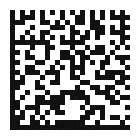

[Decoded(data=b'Some new example. Second example.', rect=Rect(left=10, top=10, width=120, height=120))]

In [467]:
iso_transf_img = Image.fromarray(albumentations.ISONoise(p=1, intensity=(0.1, 0.9))(image=np.array(img))["image"])
display(iso_transf_img)

pylibdmtx.pylibdmtx.decode(np.array(iso_transf_img))

# Augmentations

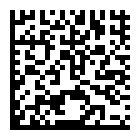

In [468]:
img

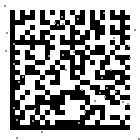

In [469]:
# CoarseDropout of the rectangular regions in the image.
Image.fromarray(albumentations.CoarseDropout(always_apply=True, fill_value=150, max_height=2, max_width=2, max_holes=40)(image=np.array(img))["image"])

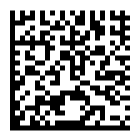

In [470]:
# Apply motion blur to the input image using a random-sized kernel.
Image.fromarray(albumentations.MotionBlur(always_apply=True, blur_limit=(3, 5))(image=np.array(img))["image"])

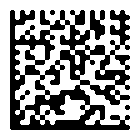

In [471]:
# Blur the input image using a median filter with a random aperture linear size.
Image.fromarray(albumentations.MedianBlur(always_apply=True, blur_limit=3)(image=np.array(img))["image"])

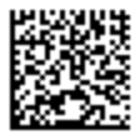

In [472]:
# Apply defocus transform.
Image.fromarray(albumentations.Defocus(always_apply=True, radius=(1,3))(image=np.array(img))["image"])

/home/kp/miniconda3/envs/dm-codes/lib/python3.9/site-packages/albumentations/augmentations/transforms.py:1554: UserWarning: Using default interpolation INTER_NEAREST, which is sub-optimal.Please specify interpolation mode for downscale and upscale explicitly.For additional information see this PR https://github.com/albumentations-team/albumentations/pull/584
  warnings.warn(


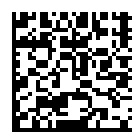

In [473]:
# Decreases image quality by downscaling and upscaling back.
Image.fromarray(albumentations.Downscale(always_apply=True)(image=np.array(img))["image"])

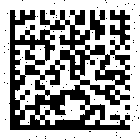

In [474]:
# Set pixels to 0 with some probability.
Image.fromarray(albumentations.PixelDropout(always_apply=True)(image=np.array(img))["image"])

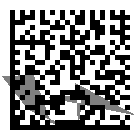

In [475]:
# Simulates shadows for the image
Image.fromarray(albumentations.RandomShadow(always_apply=True)(image=np.array(img))["image"])

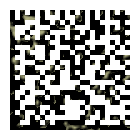

In [476]:
#
Image.fromarray(albumentations.Spatter(always_apply=True, intensity=0.8)(image=np.array(img))["image"])

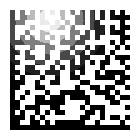

In [477]:
# Simulates Sun Flare for the image
Image.fromarray(albumentations.RandomSunFlare(always_apply=True, src_radius=100)(image=np.array(img))["image"])

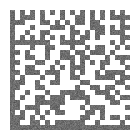

In [70]:
# ISO noise
Image.fromarray(albumentations.ISONoise(always_apply=True, intensity=(0.8, 0.9))(image=np.array(img))["image"])

In [479]:
import cv2

transform = albumentations.Compose([
    albumentations.CoarseDropout(fill_value=0, max_height=2, max_width=2, max_holes=40),
    albumentations.CoarseDropout(fill_value=255, max_height=2, max_width=2, max_holes=40),
    albumentations.OneOf([
        albumentations.MotionBlur(blur_limit=(3, 5)),
        albumentations.MedianBlur(blur_limit=3),
        albumentations.Defocus(radius=(1,3)),
    ]),
    albumentations.Spatter(),
    albumentations.Downscale(interpolation=cv2.INTER_LANCZOS4),
    albumentations.RandomShadow(),
    albumentations.RandomSunFlare(src_radius=100)
])

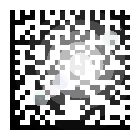

[]

In [480]:
transformed_img = Image.fromarray(transform(image=np.array(img))["image"])
display(transformed_img)

pylibdmtx.pylibdmtx.decode(np.array(transformed_img))

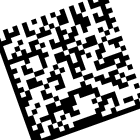

[]

In [67]:
import cv2
rotated_img = Image.fromarray(albumentations.Rotate(limit=[-20, 20], border_mode=cv2.BORDER_CONSTANT, value = [255, 255, 255], always_apply=True)(image=np.array(img))["image"])
display(rotated_img)

pylibdmtx.pylibdmtx.decode(np.array(rotated_img))

# Network

In [481]:
import datamatrix_provider as dmp

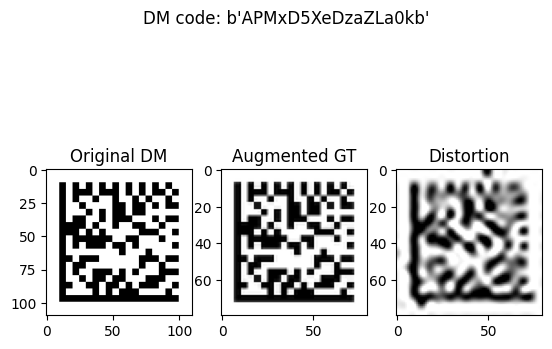

In [482]:
dm_provider_example = dmp.DataMatrixProvider(visualize=True)
dm_generate_example, dm_size_example, dm_mode_example, dm_mode_opts_example, dm_const_example = dm_provider_example.init_dm_provider(pylibdmtx_params={})
dm_clean_example, dm_augm_example, dm_text_example = dm_generate_example()

In [483]:
type(dm_clean_example)

numpy.ndarray

In [484]:
np.pad(dm_clean_example, 1, mode='constant')

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       ...,
       [  0, 255, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [485]:
str(dm_text_example)

"b'APMxD5XeDzaZLa0kb'"

In [486]:
type(dm_text_example.decode("utf8"))

str

In [487]:
foo = np.array([255, 255, 255])
foo2 = np.array([250, 240, 253])
np.isclose(foo, foo2, atol=5)

array([ True, False,  True])

In [488]:
log_n_predictions=3
bleb = 10

In [489]:
[bleb*i//log_n_predictions for i in range(log_n_predictions)]

[0, 3, 6]

In [490]:
foo_dict = {
    "col_1" : 3,
    "col_2" : 6,
    "col_3": -1
}
foo_dict_list = [foo_dict, foo_dict, foo_dict]

In [491]:
pd.DataFrame(foo_dict_list)

col_1  col_2  col_3
0      3      6     -1
1      3      6     -1
2      3      6     -1

In [492]:
foo_dict_df = pd.DataFrame(foo_dict_list).mean()
foo_dict_df

col_1    3.0
col_2    6.0
col_3   -1.0
dtype: float64

In [493]:
foo_dict_df.to_frame(name="value").reset_index(names="metric")

metric  value
0  col_1    3.0
1  col_2    6.0
2  col_3   -1.0

In [494]:
foo_dicts = pd.DataFrame(foo_dict_list).mean().to_dict()

In [495]:
import segmentation_models_pytorch as smp
import torch

model = smp.Unet(
    encoder_name="mobilenet_v2",
    encoder_weights=None,
    encoder_depth=3,
    activation="identity",
    decoder_channels=[10, 10, 10],
    in_channels=1
)

model(torch.rand(10, 1, 80, 80))
model

Unet(
  (encoder): MobileNetV2Encoder(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kernel_size=(1

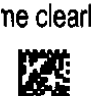

In [496]:
import PIL.Image, PIL.ImageOps
import pylibdmtx.pylibdmtx
evil_code = PIL.Image.open("evil_dm_code.png")
evil_code = PIL.ImageOps.expand(evil_code, border=1, fill="white")
try:
    pylibdmtx.pylibdmtx.decode(evil_code)
except Exception as e:
    print(e)
evil_code

In [2]:
import torch
loss = torch.nn.functional.mse_loss(torch.zeros(2, 3), torch.ones(2, 3))
type(loss.item())

float

In [20]:
tensor_foo = torch.tensor([[[1, 2, 3, 4, 5, 6, 7, 8], 
                   [10, 11, 12, 13, 14, 15, 16, 17]], 
                    
                  [[71, 72, 73, 74, 75, 76, 77, 78], 
                   [81, 82, 83, 84, 85, 86, 87, 88]]]) 

In [21]:
tensor_foo.shape

torch.Size([2, 2, 8])

In [32]:
len_dataloader_valid = 500
valid_batch_size = 64
log_n_predictions = 12
list_idxs = [len_dataloader_valid*i//log_n_predictions for i in range(log_n_predictions)]
batch_idxs = [i // valid_batch_size for i in list_idxs]
image_idxs = [i % valid_batch_size for i in list_idxs]
batch_image_idxs = [(i // valid_batch_size, i % valid_batch_size) for i in list_idxs]
print(list_idxs)
print(batch_idxs)
print(image_idxs)
print(batch_image_idxs)

[0, 41, 83, 125, 166, 208, 250, 291, 333, 375, 416, 458]
[0, 0, 1, 1, 2, 3, 3, 4, 5, 5, 6, 7]
[0, 41, 19, 61, 38, 16, 58, 35, 13, 55, 32, 10]
[(0, 0), (0, 41), (1, 19), (1, 61), (2, 38), (3, 16), (3, 58), (4, 35), (5, 13), (5, 55), (6, 32), (7, 10)]


In [31]:
batch_idx = 1
for batch_i, image_i in batch_image_idxs:
    if batch_i == batch_idx:
        print(batch_i, image_i)

1 19
1 61


In [7]:
import random
print(random.random())
print(random.sample(range(190, 250), 3))
print([random.randrange(170, 255)]*3)

0.4800636682524304
[226, 218, 211]
[238, 238, 238]


# Real data

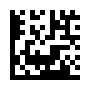

In [498]:
encoded = pylibdmtx.pylibdmtx.encode("11505771-01".encode('utf8'))
img_0631 = Image.frombytes('RGB', (encoded.width, encoded.height), encoded.pixels)
img_0631

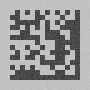

In [499]:
# rotate
img_0631_deformed = img_0631.rotate(90)
# change background white to gray
img_0631_deformed = np.array(img_0631_deformed)
red, green, blue = img_0631_deformed.T
white_areas_0631 = (red == 255) & (blue == 255) & (green == 255)
img_0631_deformed[white_areas_0631.T] = (169, 169, 169)
# add ISO noise
img_0631_deformed = Image.fromarray(albumentations.ISONoise(always_apply=True, intensity=(0.5, 1))(image=np.array(img_0631_deformed))["image"])

img_0631_deformed


In [500]:
pylibdmtx.pylibdmtx.decode(img_0631)

[Decoded(data=b'11505771-01', rect=Rect(left=9, top=10, width=70, height=69))]

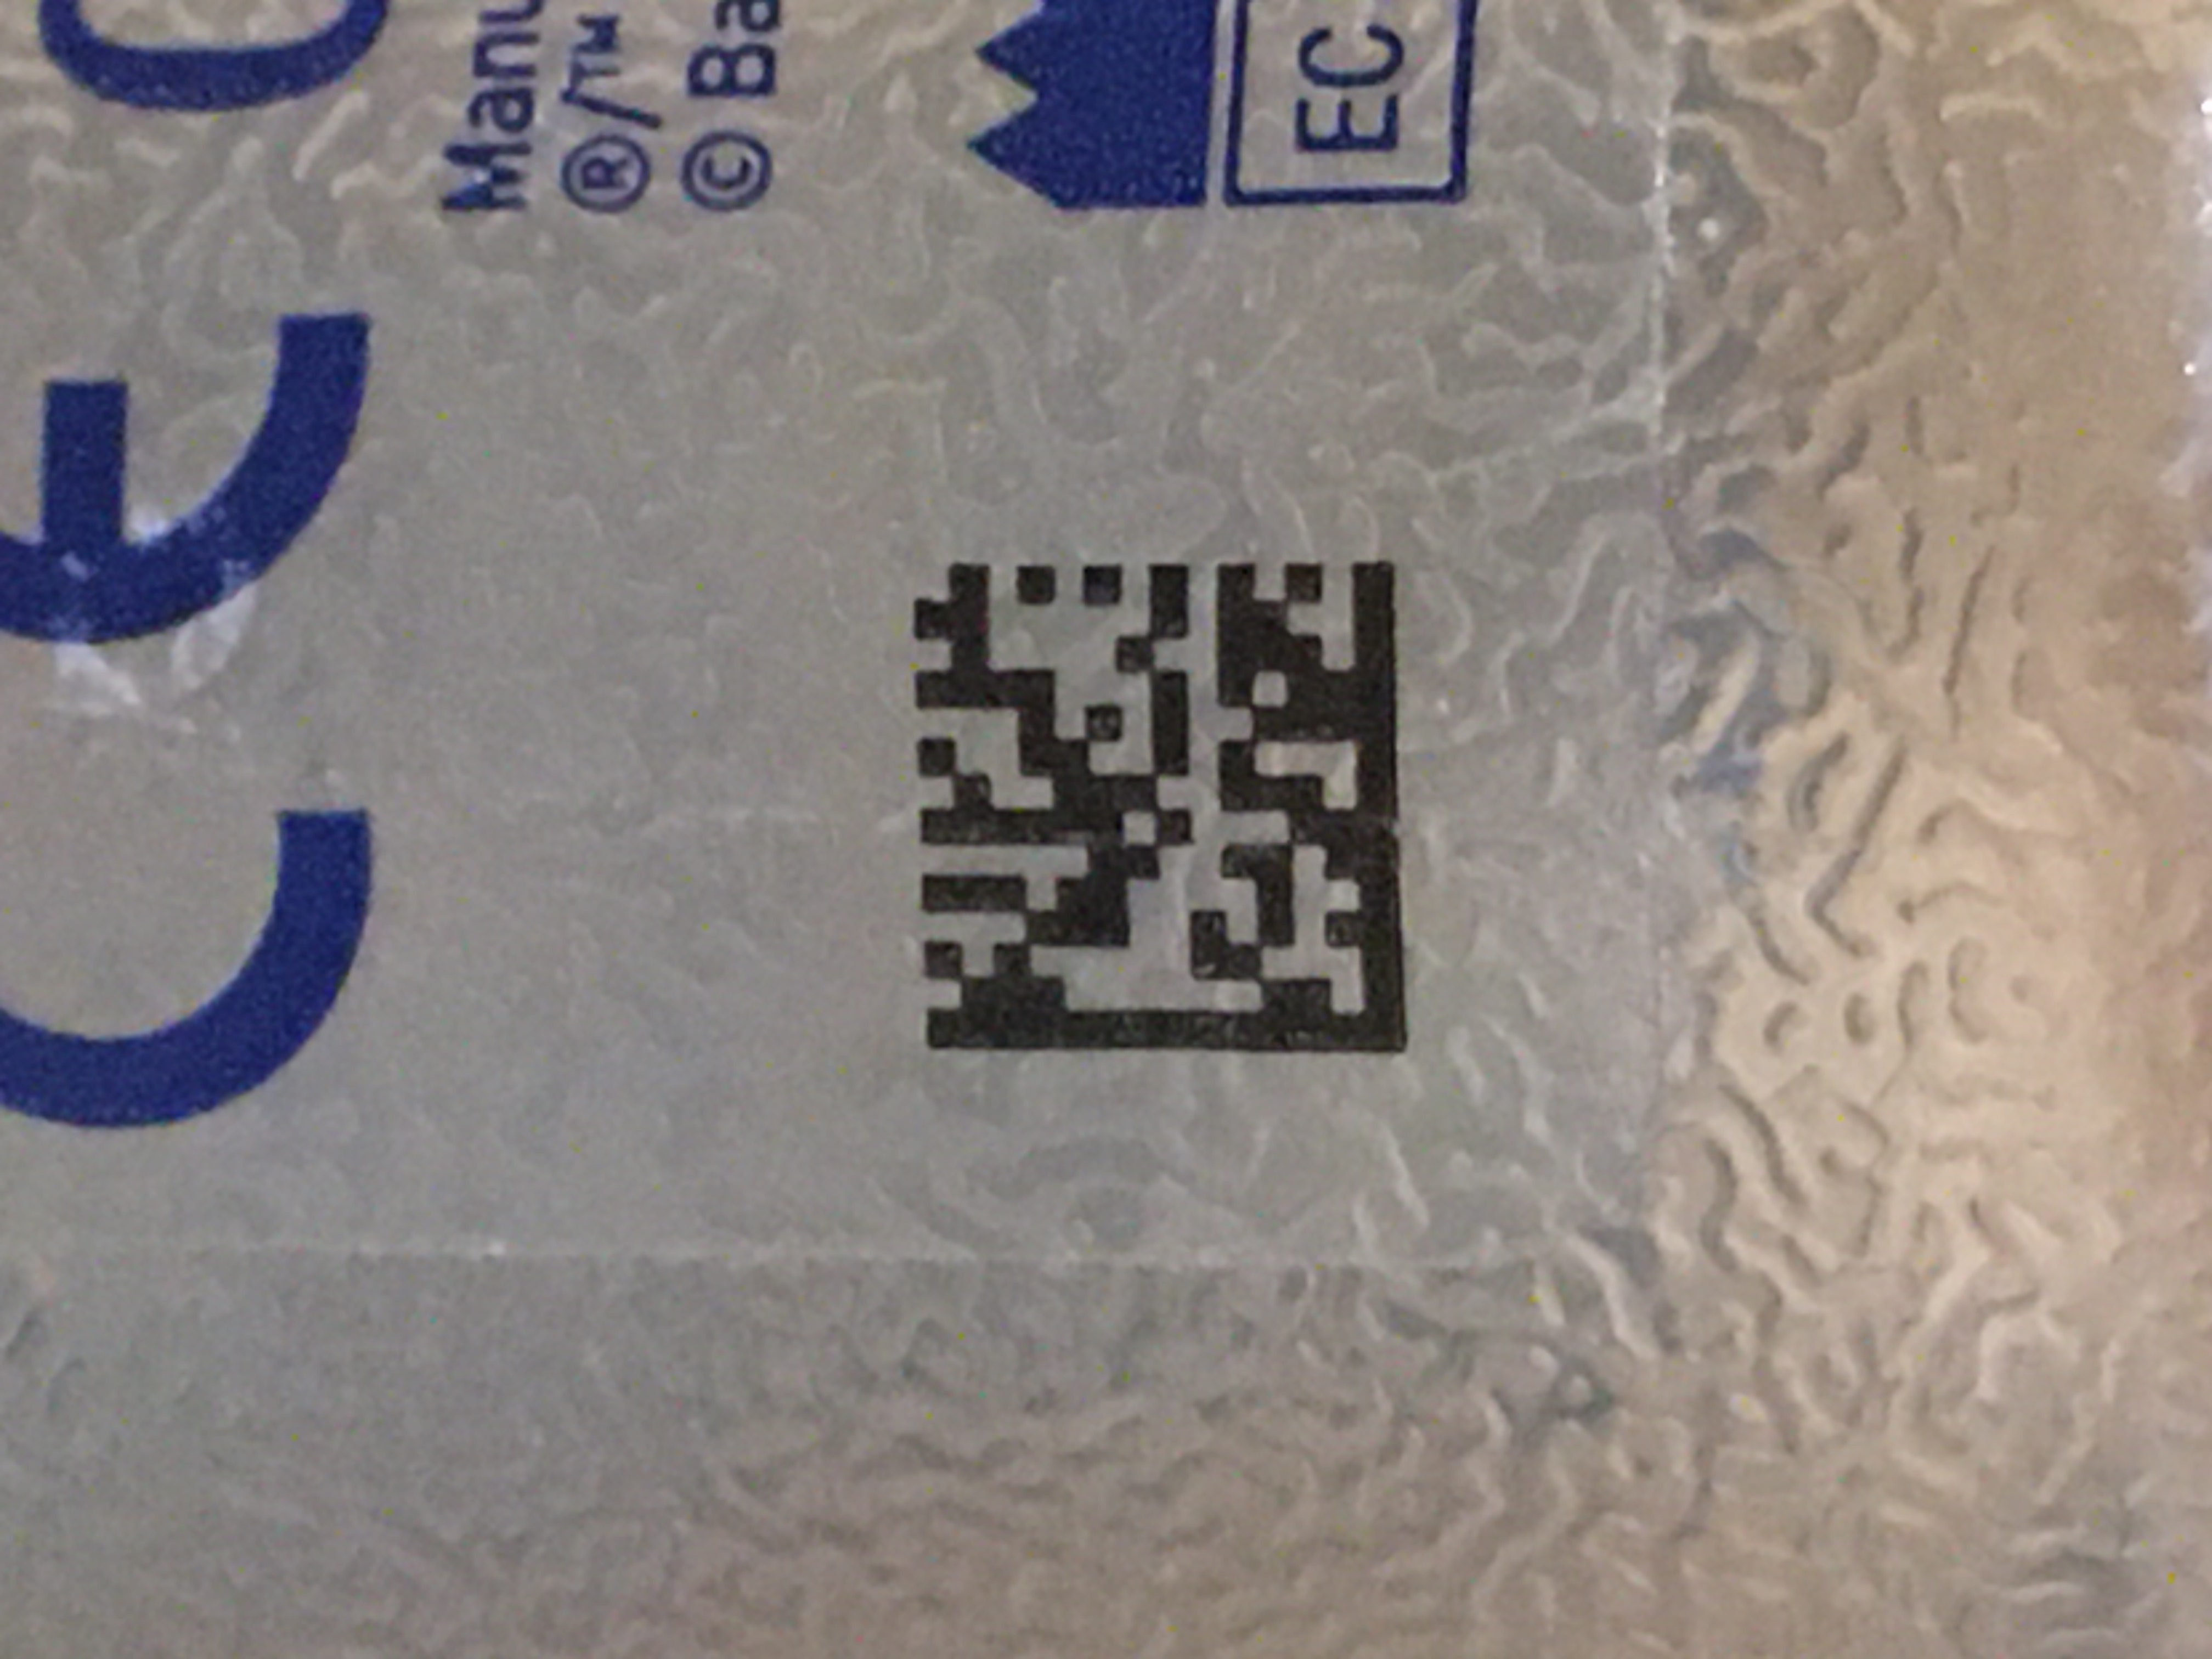

In [501]:
image_name = "IMG_0643"
dm_code = Image.open(f"../photos/{image_name}.JPG")
dm_code

In [502]:
# load annotations in json format

import json

with open(f"../photos/{image_name}.json") as json_file:
    json_data = json.load(json_file)
    print(json_data)

vertices = np.asarray(list(json_data.values()))
vertices

{'tl': [1656, 1026], 'tr': [2547, 1011], 'br': [2571, 1929], 'bl': [1680, 1920]}


array([[1656, 1026],
       [2547, 1011],
       [2571, 1929],
       [1680, 1920]])

template for json annotations:
{
"tl": [],
"tr": [],
"br": [],
"bl": []
}

In [503]:
square_side = 200
square_padding = 20
unit_square = np.asarray([
    [square_padding, square_padding],
    [square_side + square_padding, square_padding],
    [square_side + square_padding, square_side + square_padding],
    [square_padding, square_side + square_padding]])
unit_square

array([[ 20,  20],
       [220,  20],
       [220, 220],
       [ 20, 220]])

In [504]:
from skimage import transform
transf = transform.ProjectiveTransform()
if not transf.estimate(unit_square, vertices): raise Exception("estimate failed")
warped_np_image = transform.warp(np.array(dm_code), transf, output_shape=(square_side + square_padding * 2, square_side + square_padding * 2))
type(warped_np_image)


numpy.ndarray

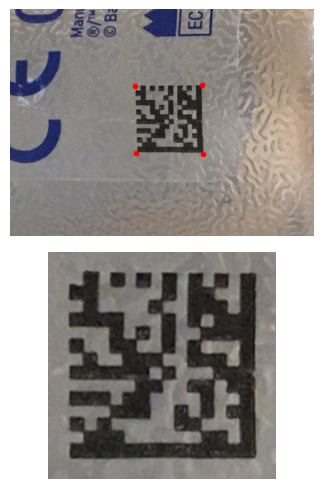

In [505]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, figsize=(10, 5))

ax[0].imshow(dm_code, cmap=plt.cm.gray)
ax[0].plot(vertices[:, 0], vertices[:, 1], '.r')
ax[1].imshow(warped_np_image)

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

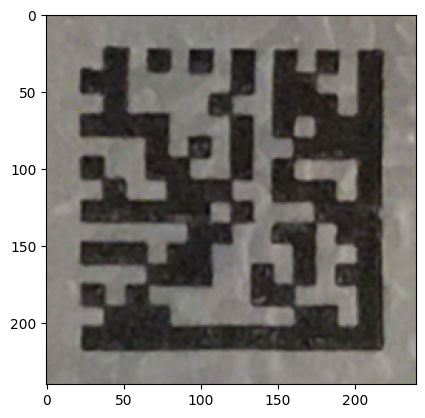

In [506]:
plt.imshow(warped_np_image)

In [507]:
print(type(warped_np_image))
print(warped_np_image.dtype)
print(warped_np_image.shape)

<class 'numpy.ndarray'>
float64
(240, 240, 3)


In [508]:
print(pylibdmtx.pylibdmtx.decode(warped_np_image))
print(pylibdmtx.pylibdmtx.decode(warped_np_image * 255))

[]
[Decoded(data=b'E51085011W', rect=Rect(left=218, top=21, width=-196, height=195))]


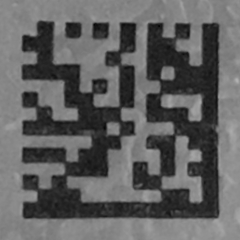

In [509]:
warped_im_image = Image.fromarray((warped_np_image * 255).astype(np.uint8))
warped_im_image = warped_im_image.convert("L")
warped_im_image

In [510]:
pylibdmtx.pylibdmtx.decode(warped_im_image)

[Decoded(data=b'E51085011W', rect=Rect(left=218, top=21, width=-196, height=195))]

In [511]:
# save the warped image to a folder
warped_im_image.save(f"../photos/cropped/{image_name}.JPG")

In [512]:
# save the original image without its metadata

original_image = Image.open(f"../photos/{image_name}.JPG")
    
data_image = list(original_image.getdata())
image_without_exif = Image.new(original_image.mode, original_image.size)
image_without_exif.putdata(data_image)

image_without_exif.save(f"../photos/without_metadata/{image_name}.JPG")

# Synthetic dataset

<class 'numpy.ndarray'>
[Decoded(data=b'Some synthetic example that seems realistic.', rect=Rect(left=9, top=10, width=130, height=129))]


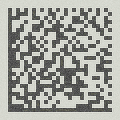

[Decoded(data=b'Some synthetic example that seems realistic.', rect=Rect(left=8, top=8, width=103, height=104))]

In [19]:
from random import sample
from cv2 import INTER_LANCZOS4

# create synthetic dm code
encoded = pylibdmtx.pylibdmtx.encode('Some synthetic example that seems realistic.'.encode('utf8'))
synth_img = Image.frombytes('RGB', (encoded.width, encoded.height), encoded.pixels)

# change background white pixels to random light color
synth_img = np.array(synth_img)
red, green, blue = synth_img.T
white_areas = (red == 255) & (blue == 255) & (green == 255)
random_colors = sample(range(180, 240), 3)
synth_img[white_areas.T] = random_colors
print(type(synth_img))
print(pylibdmtx.pylibdmtx.decode(np.array(synth_img)))

# define transformations
synth_transform = albumentations.Compose([
    albumentations.Resize(120, 120, interpolation=INTER_LANCZOS4),
    albumentations.RandomRotate90(),
    albumentations.ISONoise(intensity=(0.5, 1)),
    albumentations.OneOf([
        albumentations.MotionBlur(blur_limit=(9, 13), p=1, allow_shifted=False),
        albumentations.Defocus(radius=(3, 5), p=1),
        albumentations.Downscale(interpolation=INTER_LANCZOS4, p=1),
    ], p=0), # just for debuging
    albumentations.Spatter(intensity=0.5),
    albumentations.RandomSunFlare(src_radius=80, p=0.3)
])

# apply transformations
transf_synth_img = Image.fromarray(synth_transform(image=np.array(synth_img))["image"])
display(transf_synth_img)

# decode
pylibdmtx.pylibdmtx.decode(np.array(transf_synth_img))

In [114]:
print(type(transf_synth_img))
type(cv2.cvtColor(np.array(transf_synth_img), cv2.COLOR_RGB2GRAY))

<class 'PIL.Image.Image'>


numpy.ndarray

(150, 150)
(190, 190)


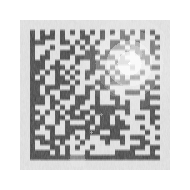

In [90]:
print(np.array(transf_synth_img.convert("L")).shape)
padded = np.pad(np.array(transf_synth_img.convert("L")), 20, mode='constant', constant_values=255)
print(padded.shape)
Image.fromarray(padded)

In [123]:
pylibdmtx.pylibdmtx.decode(padded)

[Decoded(data=b'Some synthetic example that seems realistic.', rect=Rect(left=30, top=30, width=130, height=129))]